In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
flights=pd.read_csv('data/flights.csv')
flights.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


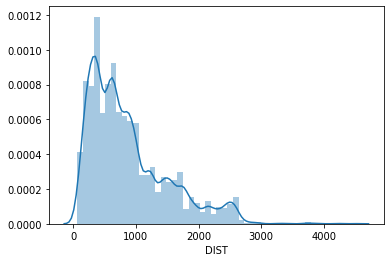

In [6]:
sns.distplot(flights['DIST'])

In [7]:
bins=[-np.inf,200,500,1000,2000,np.inf]

In [8]:
cuts=pd.cut(flights['DIST'],bins=bins)
cuts.head()

0     (500.0, 1000.0]
1    (1000.0, 2000.0]
2     (500.0, 1000.0]
3    (1000.0, 2000.0]
4    (1000.0, 2000.0]
Name: DIST, dtype: category
Categories (5, interval[float64]): [(-inf, 200.0] < (200.0, 500.0] < (500.0, 1000.0] < (1000.0, 2000.0] < (2000.0, inf]]

In [9]:
cuts.value_counts()

(500.0, 1000.0]     20659
(200.0, 500.0]      15874
(1000.0, 2000.0]    14186
(2000.0, inf]        4054
(-inf, 200.0]        3719
Name: DIST, dtype: int64

In [20]:
flights.groupby(cuts)['AIRLINE'].value_counts(normalize=True).round(3).head(15)

DIST            AIRLINE
(-inf, 200.0]   OO         0.326
                EV         0.289
                MQ         0.211
                DL         0.086
                AA         0.052
                UA         0.027
                WN         0.009
(200.0, 500.0]  WN         0.194
                DL         0.189
                OO         0.159
                EV         0.156
                MQ         0.100
                AA         0.071
                UA         0.062
                VX         0.028
Name: AIRLINE, dtype: float64

In [21]:
flights.groupby(cuts)['AIR_TIME'].quantile(q=[.25,.5,.75]).div(60).round(2)

DIST                  
(-inf, 200.0]     0.25    0.43
                  0.50    0.50
                  0.75    0.57
(200.0, 500.0]    0.25    0.77
                  0.50    0.92
                  0.75    1.05
(500.0, 1000.0]   0.25    1.43
                  0.50    1.65
                  0.75    1.92
(1000.0, 2000.0]  0.25    2.50
                  0.50    2.93
                  0.75    3.40
(2000.0, inf]     0.25    4.30
                  0.50    4.70
                  0.75    5.03
Name: AIR_TIME, dtype: float64

In [22]:
labels=['Under an Hour', '1 Hour', '1-2 Hours','2-4 Hours', '4+ Hours']

In [23]:
cuts2=pd.cut(flights['DIST'],bins=bins,labels=labels)

In [25]:
flights.groupby(cuts2)['AIRLINE'].value_counts(normalize=True).round(3).unstack().style.highlight_max(axis=1,color='green')

AIRLINE,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
DIST,,,,,,,,,,,,,,
Under an Hour,0.052,nan,nan,0.086,0.289,nan,nan,0.211,nan,0.326,0.027,nan,nan,0.009
1 Hour,0.071,0.001,0.007,0.189,0.156,0.005,nan,0.1,0.012,0.159,0.062,0.016,0.028,0.194
1-2 Hours,0.144,0.023,0.003,0.206,0.101,0.038,nan,0.051,0.03,0.106,0.131,0.025,0.004,0.138
2-4 Hours,0.264,0.016,0.003,0.165,0.016,0.031,nan,0.003,0.045,0.046,0.199,0.04,0.012,0.16
4+ Hours,0.212,0.012,0.08,0.171,nan,0.004,0.028,nan,0.019,nan,0.289,0.065,0.074,0.046
